In [4]:
import nilearn

from nilearn import plotting

Vamos apresentar a imagem estrutural deste participante.

# H1
## header2
### header 3

Pegar no fluxograma e ir apresentando os passos.



/Users/home/.local/lib/python3.8/site-packages/nilearn/image/resampling.py:527: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


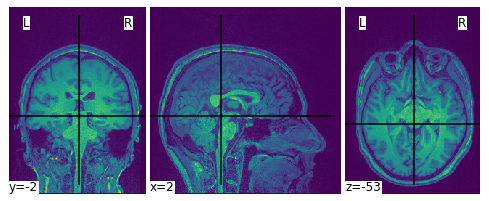

In [3]:
t1w_file_path='/Users/home/Documents/BIDS/sub-0001/ses-001/anat/sub-0001_ses-001_run-01_T1w.nii.gz'
plotting.plot_img(t1w_file_path)